In [1]:
%pylab inline
rcParams['figure.figsize'] = (10, 4) #wide graphs by default
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


# Audio Filters

In [2]:
sig = random.random(2048)*2 -1

<matplotlib.colorbar.Colorbar instance at 0x057A9AA8>

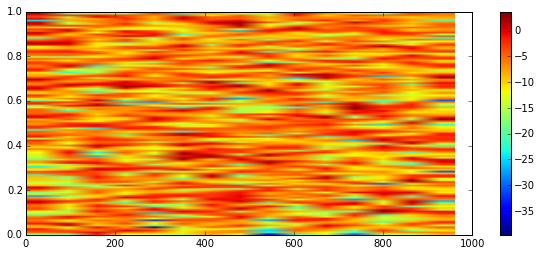

In [3]:
Pxx, freqs, times, im = specgram(sig);
colorbar()

In [4]:
Pxx.shape

(129, 15)

In [5]:
2048/128

16.0

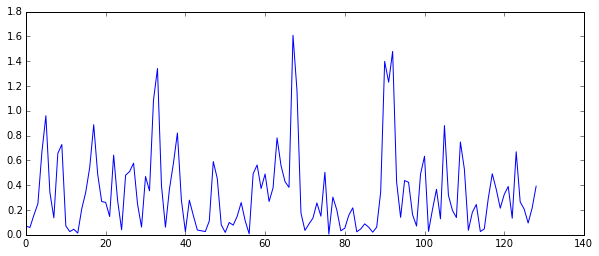

In [6]:
plot(Pxx[:,10])

<matplotlib.colorbar.Colorbar instance at 0x05BAC1C0>

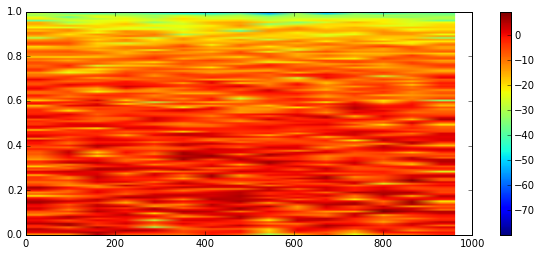

In [7]:
filtered = (sig + r_[0,sig[:-1]])
Pxx2, freqs, times, im = specgram(filtered);
colorbar()

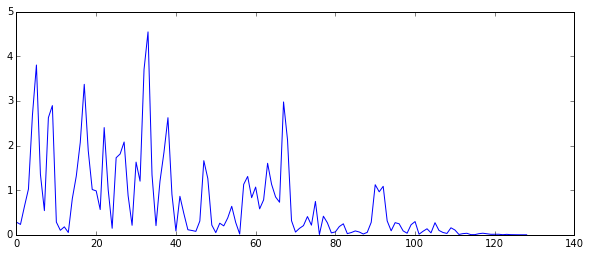

In [8]:
plot(Pxx2[:,10])

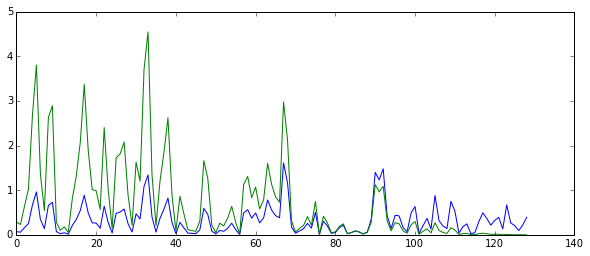

In [9]:
plot(Pxx[:,10])
plot(Pxx2[:,10])

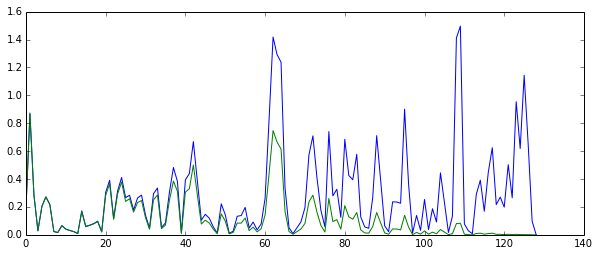

In [142]:
plot(Pxx[:,10])
plot(Pxx2[:,10]/4.0)

Difference equation:

$$y(n) = b_0x(n) + b_1x(n-1) + ... + b_Mx(n-M)$$

for this simple filter:

$$y(n) = x(n) + x(n-1)$$

You can estimate the effect of frequency from the difference equation!

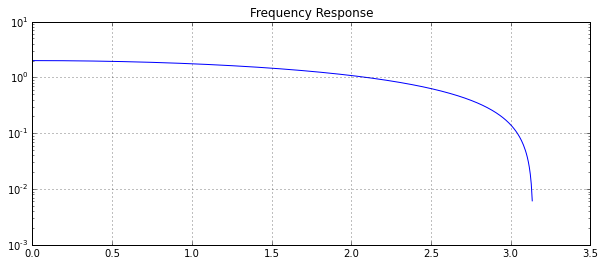

In [10]:
from scipy.signal import freqz
frq, resp = freqz([1,1])
semilogy(frq, abs(resp))
title('Frequency Response')
grid()


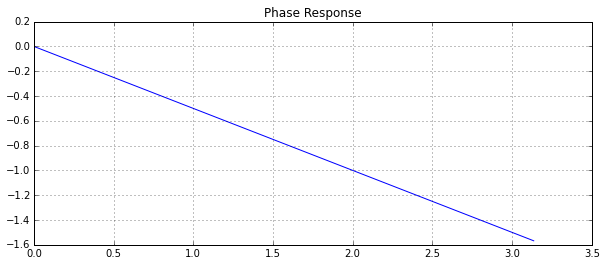

In [11]:
plot(frq, angle(resp))
title('Phase Response')
grid()

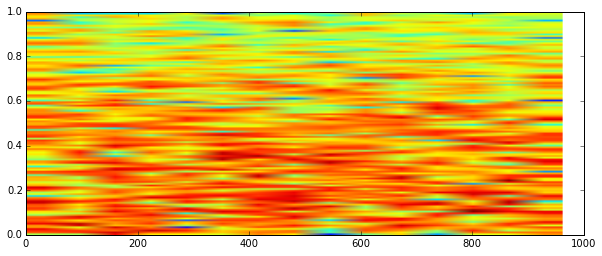

In [12]:
filtered2 = (sig + 0.5*r_[0,sig[:-1]])
Pxx3, freqs, times, im = specgram(filtered2);

$$y(n) = x(n) + 0.5 \cdot x(n-1)$$

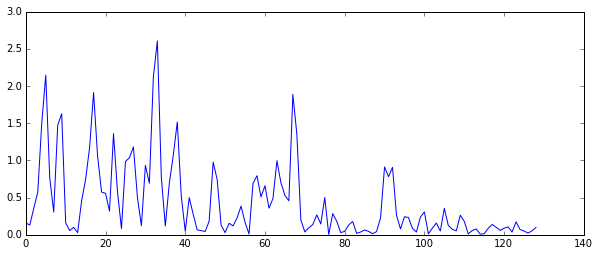

In [13]:
plot(Pxx3[:,10])

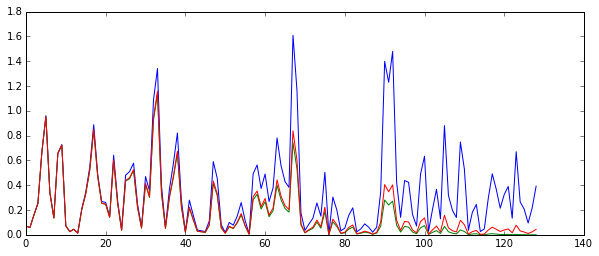

In [14]:
plot(Pxx[:,10])
plot(Pxx2[:,10]/4.0)
plot(Pxx3[:,10]/(1.5**2))

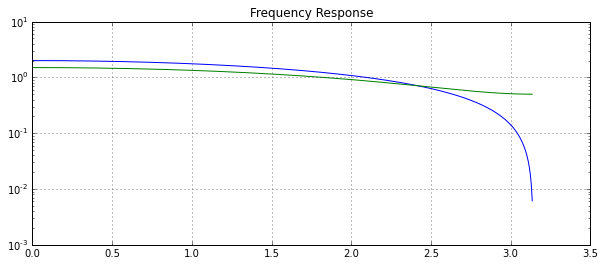

In [15]:
from scipy.signal import freqz
frq, resp = freqz([1,1])
semilogy(frq, abs(resp))

frq, resp = freqz([1,0.5])
semilogy(frq, abs(resp))
title('Frequency Response')
grid()

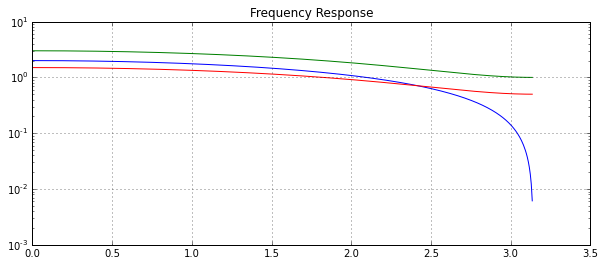

In [16]:
frq, resp = freqz([1,1])
semilogy(frq, abs(resp))

frq, resp = freqz([1,2])
semilogy(frq, abs(resp))


frq, resp = freqz([1,0.5])
semilogy(frq, abs(resp))
title('Frequency Response')
grid()

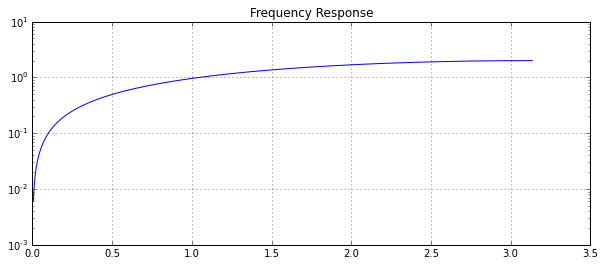

In [17]:
frq, resp = freqz([1,-1])
semilogy(frq, abs(resp))
title('Frequency Response')
grid()

# Transfer function

$$ Y(z) = H(z) \cdot X(z) $$

$$ H(z) = \frac{Y(z)}{X(z)} $$


# z-transform

$$\mathcal{Z}[x(n-M)] = z^{-M}X(z)$$

z-transform on the difference equation:

$$Y(z) = b_0z^{0}X(z) + b_1z^{-1}X(z) + ... + b_Mz^{-M}X(z) - a_1z^{-1}Y(z) - a_2z^{-2}Y(z) - ... - a_Mz^{-M}Y(z)$$

$$ [1 + a_1z^{-1} + a_2z^{-2} - ... + a_Mz^{-M}] \cdot Y(z) = [b_0z^{0} + b_1z^{-1} + ... + b_Mz^{-M}]\cdot X(z) $$

$$H(z) = \frac{Y(z)}{X(z)} = \frac{b_0z^{0} + b_1z^{-1} + ... + b_Mz^{-M}}{ 1 + a_1z^{-1} - a_2z^{-2} - ... - a_Mz^{-M}}$$


# One-pole filters

$$y(n) = b_0x(n) - a_1y(n-1)$$

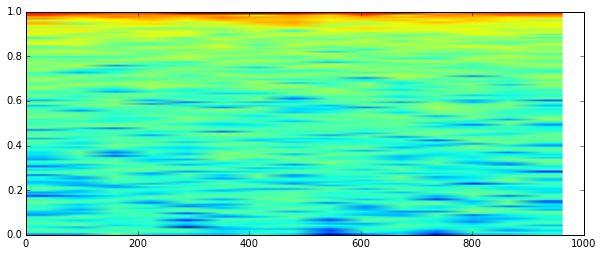

In [18]:
from scipy.signal import lfilter
filtered4 = lfilter([1],[1, 1], sig)
specgram(filtered4);

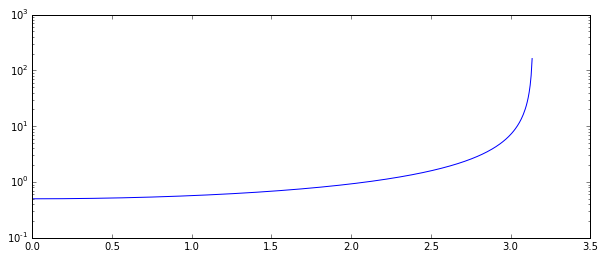

In [19]:
frq, Y = freqz([1], [1,1])
semilogy(frq, abs(Y))


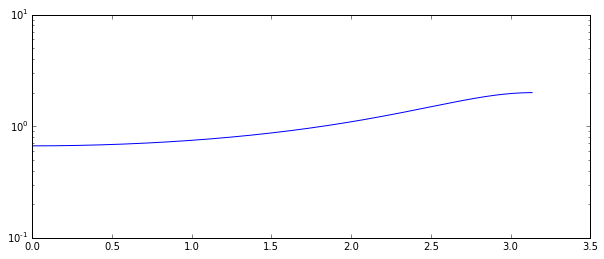

In [20]:
frq, Y = freqz([1], [1,0.5])
semilogy(frq, abs(Y))

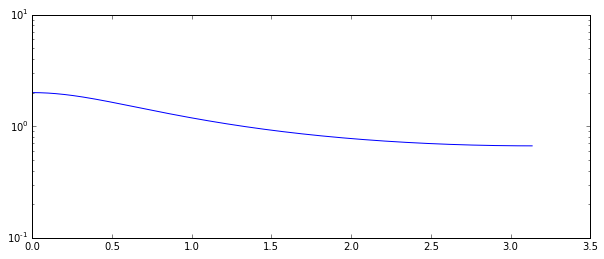

In [21]:
frq, Y = freqz([1], [1,-0.5])
semilogy(frq, abs(Y))

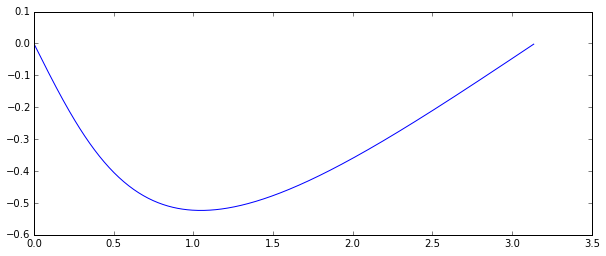

In [22]:
frq, Y = freqz([1], [1,-0.5])
plot(frq, angle(Y))

$$H(z) = \frac{b_0z^{0} + b_1z^{-1} + \cdots + b_Mz^{-M}}{ a_0z^{0} + a_1z^{-1} + a_2z^{-2}  + \cdots + a_Mz^{-M}}$$

 * FIR filters are always stable
 * IIR filters can produce steeper filters with smaller orders

# Pole-zero analysis

In [29]:
from scipy.signal import tf2zpk

tf2zpk([1,2,1],[1])

(array([-1., -1.]), array([], dtype=float64), 1.0)

In [30]:
tf2zpk([1],[1, 1])

(array([], dtype=float64), array([-1.]), 1.0)

In [31]:
tf2zpk([2, 2],[1])

(array([-1.]), array([], dtype=float64), 2.0)

In [32]:
def PoleZeroPlot(b, a):
    (zeros,poles,gain) = tf2zpk(b, a)
    angle = np.linspace(-np.pi,np.pi,50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    figure()
    plot(poles.real, poles.imag, 'x', zeros.real, zeros.imag, 'o', cirx,ciry, 'k-')
    grid()
    
    xlim((-2, 2))
    xlabel('Real')
    ylim((-1.5, 1.5))
    ylabel('Imag')
    gcf().set_figwidth(5)
    return (zeros,poles,gain)

(array([ 1.,  1.]), array([], dtype=float64), 1.0)

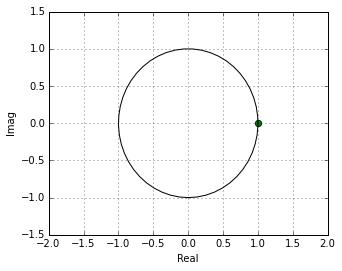

In [36]:
PoleZeroPlot([1,-2,1],[1])

(array([], dtype=float64), array([-1.]), 1.0)

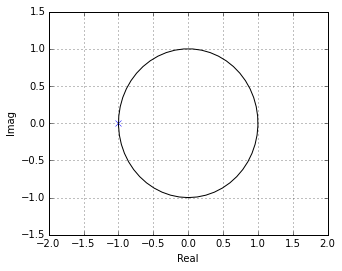

In [28]:
PoleZeroPlot([1],[1,1])

(array([], dtype=float64), array([-1.1]), 1.0)

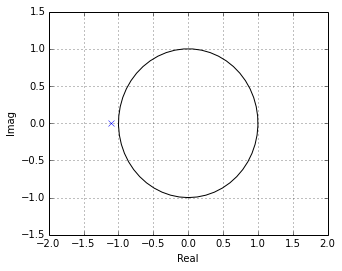

In [162]:
PoleZeroPlot([1],[1,1.1])

When a pole is outside the unit circle in the z-plane the filter is unstable!

(array([], dtype=float64), array([-1.]), 0.90909090909090906)

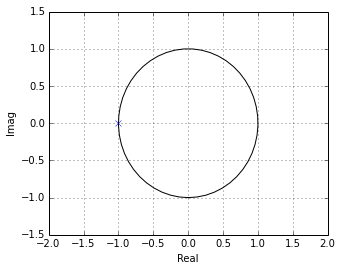

In [163]:
PoleZeroPlot([1],[1.1,1.1])

# Comb filters

$$y(n) = b_0x(n) + b_m\cdot x(n-m)$$

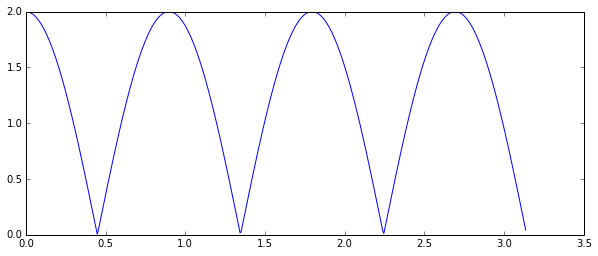

In [167]:
b = [1,0,0,0,0,0,0,1]
a = [1]
frq, resp = freqz(b,a)
plot(frq, abs(resp))

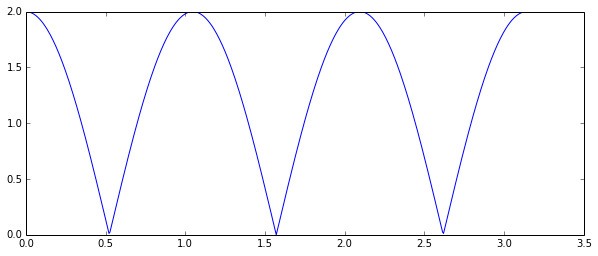

In [168]:
b = [1,0,0,0,0,0,1]
a = [1]
frq, resp = freqz(b,a)
plot(frq, abs(resp))

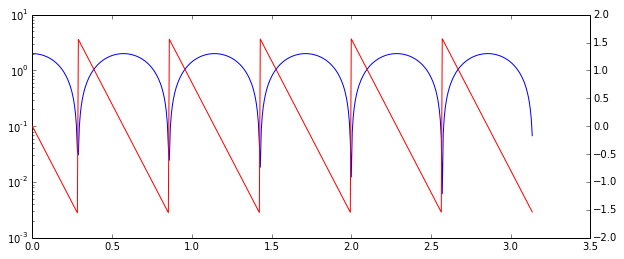

In [169]:
b = [1,0,0,0,0,0,0,0,0,0,0,1]
a = [1]
frq, resp = freqz(b,a)
semilogy(frq, abs(resp))

twinx()

plot(frq, angle(resp), 'r')

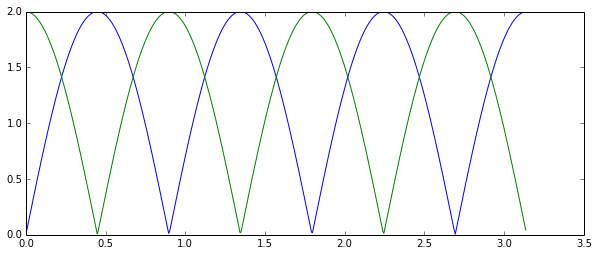

In [170]:
b = [1,0,0,0,0,0,0,-1]
a = [1]
frq, resp = freqz(b,a)
plot(frq, abs(resp))

b = [1,0,0,0,0,0,0,1]
a = [1]
frq, resp = freqz(b,a)
plot(frq, abs(resp))

## IIR Comb-fiters

$$y(n) = b_0x(n) + b_m\cdot x(n-m) - a_m\cdot y(n-m)$$

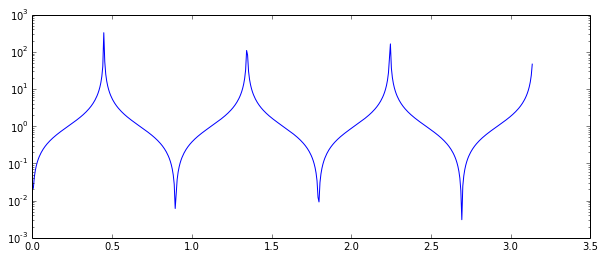

In [175]:
b = [1,0,0,0,0,0,0,-1]
a = [1,0,0,0,0,0,0,1]
frq, resp = freqz(b,a)
semilogy(frq, abs(resp));

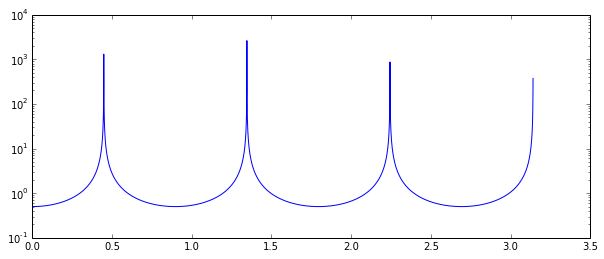

In [177]:
b = [1]
a = [1,0,0,0,0,0,0,1]
frq, resp = freqz(b,a, worN=8192)
semilogy(frq, abs(resp));

# Two-zero filters

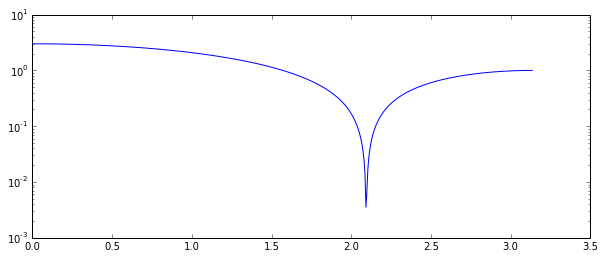

In [178]:
b = [1, 1, 1]
a = [1]
frq, resp = freqz(b,a)
semilogy(frq, abs(resp))

$$\frac{b_1}{b_0} = -2R\cos(\Theta_c)$$
$$\frac{b_2}{b_0} = R^2$$

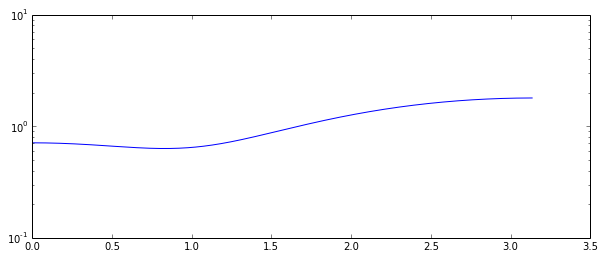

In [179]:
R = 0.5
theta_c = 1.0
b = [1, -2*R*cos(theta_c), R**2]
a = [1]

frq, resp = freqz(b,a)
semilogy(frq, abs(resp))

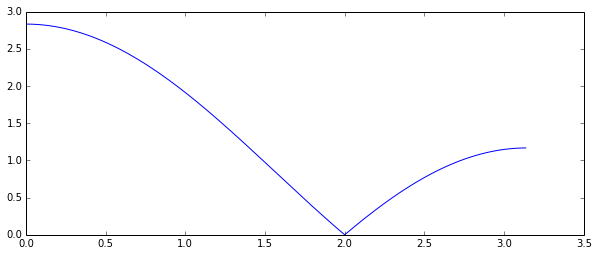

In [180]:
R = 1
theta_c = 2.0
b = [1, -2*R*cos(theta_c), R**2]
a = [1]

frq, resp = freqz(b,a)
plot(frq, abs(resp))

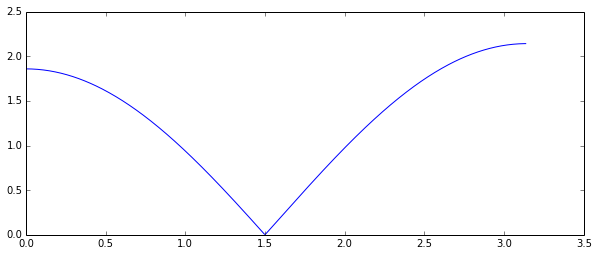

In [181]:
R = 1
theta_c = 1.5
b = [1, -2*R*cos(theta_c), R**2]
a = [1]

frq, resp = freqz(b,a)
plot(frq, abs(resp))

(array([ 0.0707372+0.99749499j,  0.0707372-0.99749499j]),
 array([], dtype=float64),
 1.0)

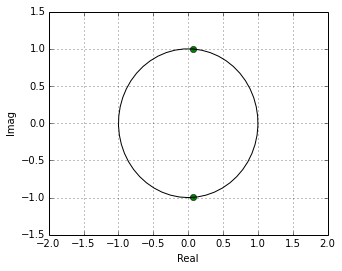

In [182]:
PoleZeroPlot(b,a)

# Two-pole filters

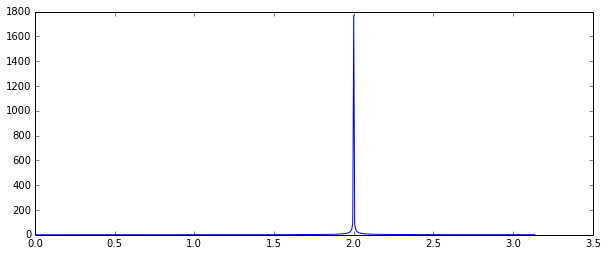

In [183]:
R = 1
theta_c = 2.0
b = [1]
a = [1, -2*R*cos(2.0), R**2]

frq, resp = freqz(b,a)
plot(frq, abs(resp))

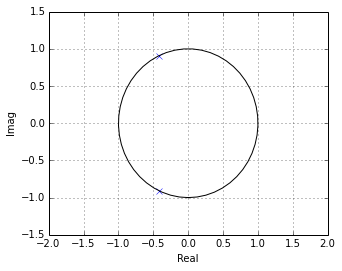

In [184]:
poles, zeros, k = PoleZeroPlot(b,a)

In [185]:
abs(zeros)

array([ 1.,  1.])

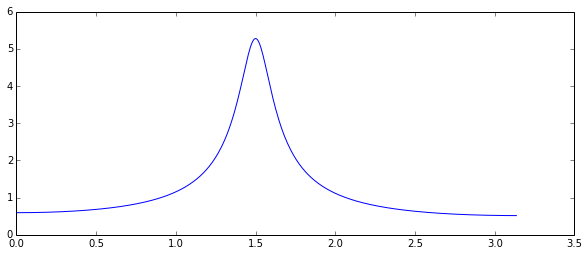

In [186]:
R = 0.9
theta_c = 1.5
b = [1]
a = [1, -2*R*cos(theta_c), R**2]

frq, resp = freqz(b,a)
plot(frq, abs(resp))

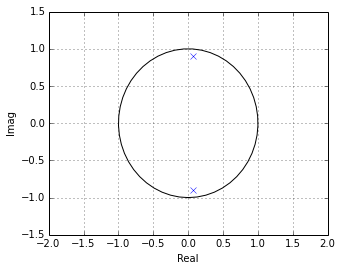

In [187]:
poles, zeros, k = PoleZeroPlot(b,a)

# Biquad Filter

$$H(z) = \frac{b_0z^{0} + b_1z^{-1} +  b_2z^{-2}}{ a_0z^{0} + a_1z^{-1} + a_2z^{-2}}$$

Great "cookbook":
[http://www.musicdsp.org/files/Audio-EQ-Cookbook.txt](http://www.musicdsp.org/files/Audio-EQ-Cookbook.txt)

In [188]:
# low shelf-filter

Fs = 44100
f0 = 10000.0
dBgain = 30.0
S = 1.0 # shelf slope
# -----------------------
A  = 10**(dBgain/40)

w0 = 2*pi*f0/Fs
alpha = sin(w0)/2 * sqrt( (A + 1/A)*(1/S - 1) + 2 ) 
       
b0 =    A*( (A+1) - (A-1)*cos(w0) + 2*sqrt(A)*alpha )
b1 =  2*A*( (A-1) - (A+1)*cos(w0)                   )
b2 =    A*( (A+1) - (A-1)*cos(w0) - 2*sqrt(A)*alpha )
a0 =        (A+1) + (A-1)*cos(w0) + 2*sqrt(A)*alpha
a1 =   -2*( (A-1) + (A+1)*cos(w0)                   )
a2 =        (A+1) + (A-1)*cos(w0) - 2*sqrt(A)*alpha

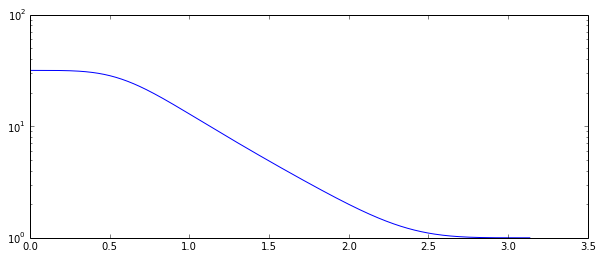

In [189]:
w, h = freqz([b0, b1, b2], [a0, a1, a2])
semilogy(w,abs(h))

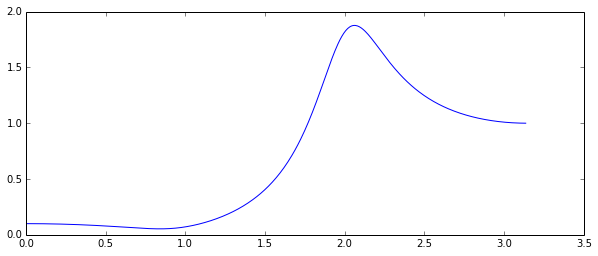

In [190]:
Fs = 44100
f0 = 10000.0
dBgain = -20.0
S = 2.0 # shelf slope

A  = 10**(dBgain/40)

w0 = 2*pi*f0/Fs
alpha = sin(w0)/2 * sqrt( (A + 1/A)*(1/S - 1) + 2 ) 
    
    
b0 =    A*( (A+1) - (A-1)*cos(w0) + 2*sqrt(A)*alpha )
b1 =  2*A*( (A-1) - (A+1)*cos(w0)                   )
b2 =    A*( (A+1) - (A-1)*cos(w0) - 2*sqrt(A)*alpha )
a0 =        (A+1) + (A-1)*cos(w0) + 2*sqrt(A)*alpha
a1 =   -2*( (A-1) + (A+1)*cos(w0)                   )
a2 =        (A+1) + (A-1)*cos(w0) - 2*sqrt(A)*alpha

w, h = freqz([b0, b1, b2], [a0, a1, a2])
plot(w,abs(h))

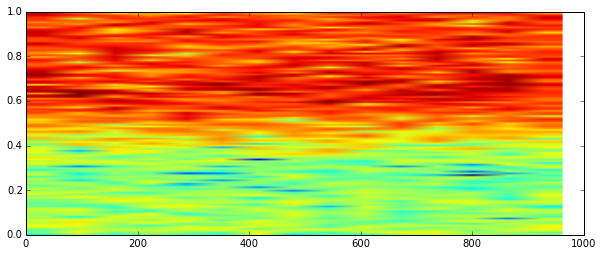

In [191]:
shelved = lfilter([b0, b1, b2], [a0, a1, a2], sig)
specgram(shelved);

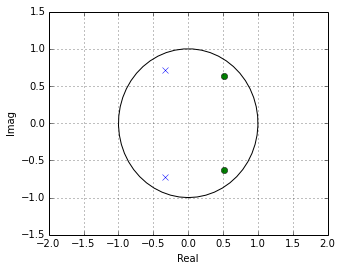

In [193]:
PoleZeroPlot([b0, b1, b2], [a0, a1, a2]);

# Filter families

<img src="http://upload.wikimedia.org/wikipedia/commons/5/5c/Electronic_linear_filters.svg" width="100%">

## Chebyshev Filters

http://en.wikipedia.org/wiki/Chebyshev_filter

* Type I: Ripple in the pass-band only
* Type II: Ripple in the stop-band only

In [195]:
from scipy.signal import cheby1

b, a = cheby1(2, 0.4, 0.5)
b,a

(array([ 0.38096036,  0.76192073,  0.38096036]),
 array([ 1.        ,  0.32450947,  0.27114842]))

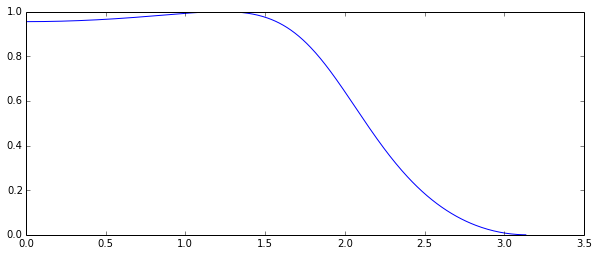

In [196]:
w, h = freqz(b,a)
plot(w, np.abs(h), 'b')

(array([-1., -1.]),
 array([-0.16225474+0.49479472j, -0.16225474-0.49479472j]),
 0.3809603640233169)

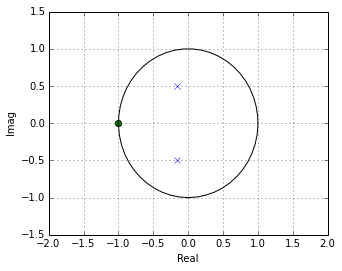

In [197]:
PoleZeroPlot(b,a)

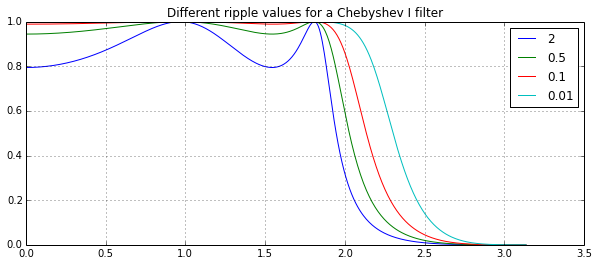

In [198]:
ripples = [2, 0.5, 0.1, 0.01]

for ripple in ripples:
    b, a = cheby1(4, ripple, 0.6)
    frq, resp = freqz(b,a)
    plot(frq, abs(resp))


legend(ripples)
title('Different ripple values for a Chebyshev I filter')
grid()

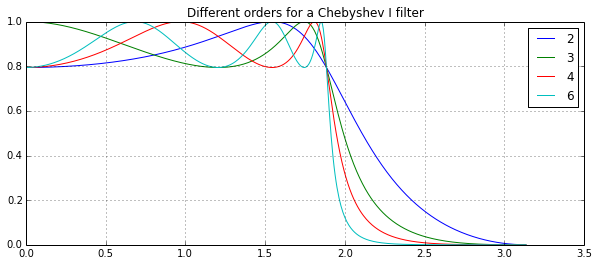

In [199]:
orders = [2,3,4,6]

for order in orders:
    b, a = cheby1(order, 2, 0.6)
    frq, resp = freqz(b,a)
    plot(frq, abs(resp))


legend(orders)
title('Different orders for a Chebyshev I filter')
grid()

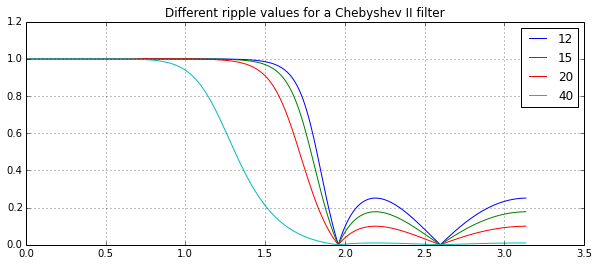

In [200]:
from scipy.signal import cheby2

ripples = [12, 15, 20, 40]

for ripple in ripples:
    b, a = cheby2(4, ripple, 0.6)
    frq, resp = freqz(b,a)
    plot(frq, abs(resp))

legend(ripples)
title('Different ripple values for a Chebyshev II filter')
grid()

## Butterworth, Elliptic and Bessel filters

In [201]:
from scipy.signal import iirdesign

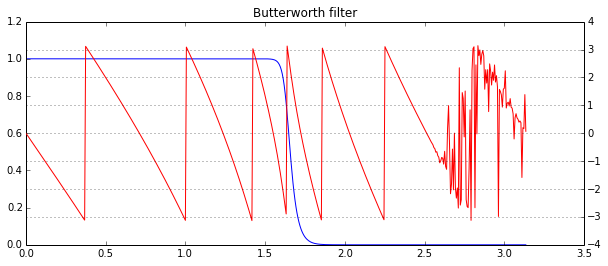

In [208]:
Wp = 0.5  # Cutoff frequency 
Ws = 0.6   # Stop frequency 
Rp = 0.1     # passband maximum loss (gpass)
As = 60      # stoppand min attenuation (gstop)
b,a = iirdesign(Wp, Ws, Rp, As, ftype='butter')
frq, resp = freqz(b,a)
plot(frq, abs(resp))
twinx()
plot(frq, angle(resp), 'r')

title('Butterworth filter')
grid()

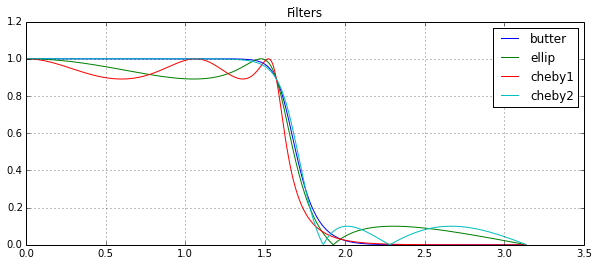

In [207]:
Wp = 0.5  # Cutoff frequency 
Ws = 0.6   # Stop frequency 
Rp = 1     # passband maximum loss (gpass)
As = 20      # stoppand min attenuation (gstop)

types = ['butter', 'ellip', 'cheby1', 'cheby2']

for t in types:
    b,a = iirdesign(Wp, Ws, Rp, As, ftype=t)
    frq, resp = freqz(b,a)
    plot(frq, abs(resp))
    
legend(types)
title('Filters')
grid()

You can use the *iirfilter* function from scipy.signal to design and filter in a single step.

http://docs.scipy.org/doc/scipy/reference/signal.html#filter-design

## Approximating arbitrary responses

There are several techniques that allow you to arbitrarily define target filter responses.

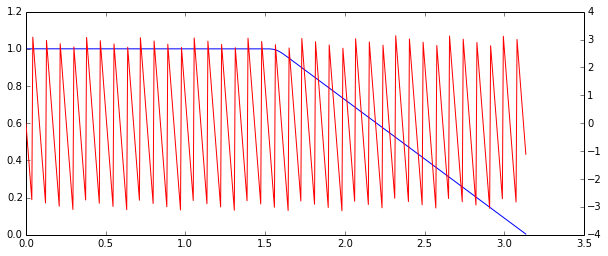

In [209]:
from scipy.signal import firwin2

freqs = [0.0, 0.5, 1.0]
gains = [1.0, 1.0, 0.0]
order = 150

taps = firwin2(order, freqs, gains)

frq, resp = freqz(taps)
plot(frq, abs(resp))
twinx()
plot(frq, angle(resp), 'r')


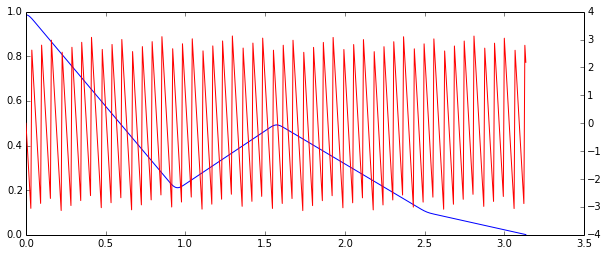

In [215]:
freqs = [0.0, 0.3, 0.5, 0.8, 1.0]
gains = [1.0, 0.2, 0.5, 0.1, 0.0]
order = 200

taps = firwin2(order, freqs, gains)

frq, resp = freqz(taps)
plot(frq, abs(resp))
twinx()
plot(frq, angle(resp), 'r')

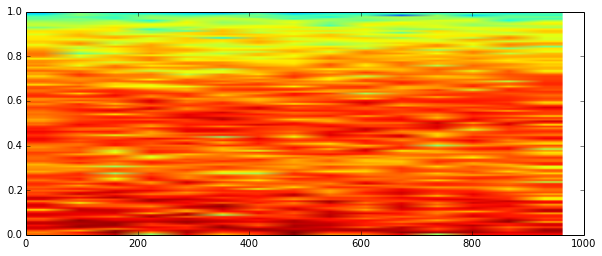

In [216]:
shaped = lfilter(taps, [1], sig)
specgram(shaped);

## Parks-McClellan Filter design

http://en.wikipedia.org/wiki/Parks%E2%80%93McClellan_filter_design_algorithm

## Remez filter design

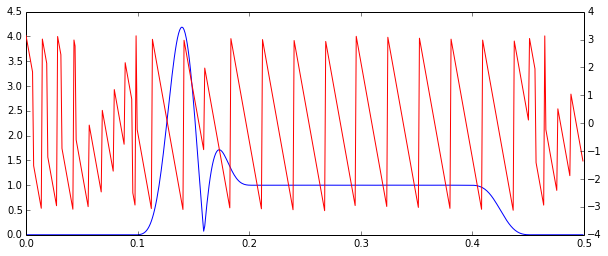

In [217]:
from scipy.signal import remez
        
freqs = [0, 0.1, 0.2, 0.4, 0.45, 0.5]
gains = [0, 1, 0]

taps = remez(72, freqs, gains, type='bandpass')

frq, resp = freqz(taps)
plot(frq/(2*pi), abs(resp))
twinx()
plot(frq/(2*pi), angle(resp), 'r')

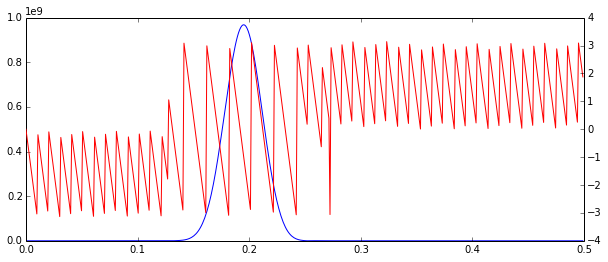

In [218]:
from scipy.signal import remez
        
freqs = [0, 0.1, 0.3, 0.4, 0.45, 0.5]
gains = [0, 1, 0]

taps = remez(100, freqs, gains, type='bandpass')

frq, resp = freqz(taps)
plot(frq/(2*pi), abs(resp))
twinx()
plot(frq/(2*pi), angle(resp), 'r')

# All-pass filters

Many ways of doing them. One is:

$$y(n) = -gx(n) + x(n-D) + gy(y-D)$$

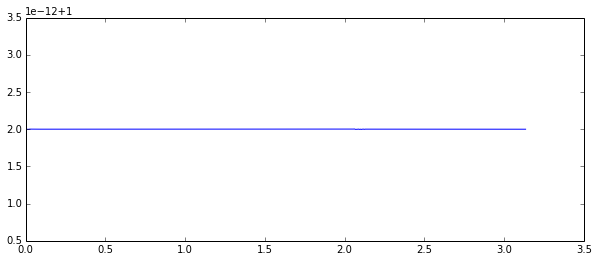

In [219]:
from scipy.signal import freqz
g = 0.9
b = [-g, 0,0, 1]
a = [1, 0,0,-g]
frq, resp = freqz(b,a)
plot(frq, abs(resp))

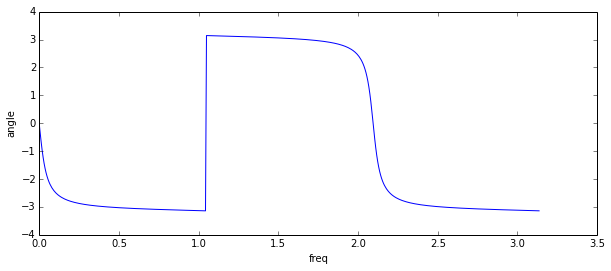

In [220]:
plot(frq, angle(resp))
xlabel('freq')
ylabel('angle')

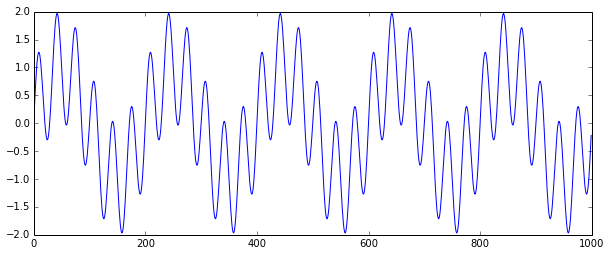

In [221]:
sig = sin(linspace(0, 2*pi*5, 1000, endpoint=False)) + sin(linspace(0, 2*pi*30, 1000, endpoint=False))
plot(sig)

(0, 80)

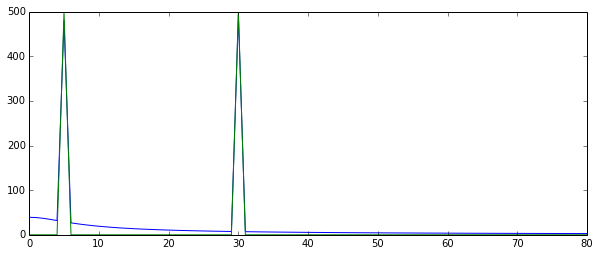

In [222]:
from scipy.signal import lfilter
f = lfilter(b, a, sig)
plot(abs(rfft(f)))
plot(abs(rfft(sig)))
xlim((0,80))

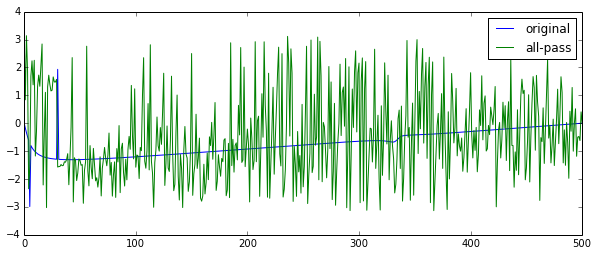

In [223]:
plot(angle(rfft(f)))
plot(angle(rfft(sig)))

legend(['original', 'all-pass'])

(0, 50)

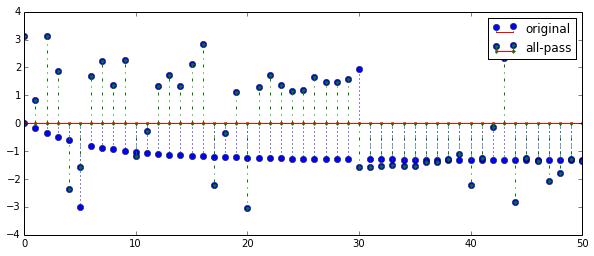

In [224]:
stem(angle(rfft(f)),linefmt='b:')
stem(angle(rfft(sig)), 'g.-.')

legend(['original', 'all-pass'])
xlim(0,50)

In [225]:
angle(resp)[5], angle(resp)[30]

(-1.4376450639128875, -2.7742892239674024)

In [226]:
angle(rfft(f))[5] - angle(rfft(sig))[5]

-1.4165245589590689

In [227]:
angle(rfft(f))[30] - angle(rfft(sig))[30]

3.5012099242089638

hmmm....

In [228]:
angle(rfft(f))[30] - angle(rfft(sig))[30] - (2 * pi)

-2.7819753829706224

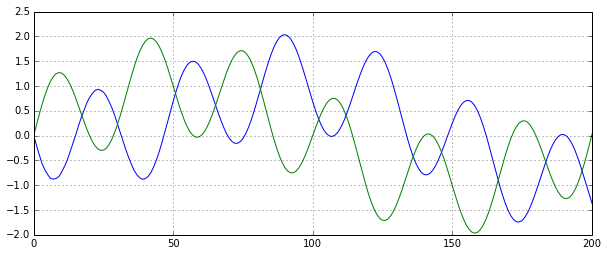

In [229]:
plot(f)
plot(sig)
xlim((0, 200))
grid()

By: Andrés Cabrera mantaraya36@gmail.com
For MAT course MAT 201A at UCSB

This ipython notebook is licensed under the CC-BY-NC-SA license: http://creativecommons.org/licenses/by-nc-sa/4.0/

![http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png](http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png)